# **Explorando el Tejido Urbano: Un Análisis Integral de Crímenes, Tendencias Temporales y su Relación con la Plataforma Uber en Ciudades a través de Machine Learning**


Agenda
#1. Abstracto
#2. Motivación
#3. Audiencia
#4. Objetivo General
#5. Objetivos Específicos
#6. Preguntas/Hipótesis
#7. Lectura de datos e Inicialización de Librerías
#8. Visualizaciones y Resúmenes Numéricos
#9. Análisis Exploratorio EDA
#10. Conclusiones

#1 Abstracto:

El proyecto de análisis de datos se enfoca en investigar la relación entre los incidentes urbanos, particularmente los crímenes, y la presencia de la plataforma de transporte Uber. A través de este análisis, se busca comprender cómo la disponibilidad y el uso de Uber pueden influir en los patrones de criminalidad en diversas áreas urbanas. Este estudio se basa en la exploración de un conjunto de datos que incluye información detallada sobre diversos tipos de crímenes, así como datos relacionados con la actividad de Uber en diferentes ciudades. El análisis se realizará utilizando técnicas de análisis exploratorio de datos y modelos de machine learning para identificar patrones, tendencias y posibles correlaciones entre la presencia de Uber y la incidencia de crímenes en diferentes contextos urbanos.

#2 Motivación:

La motivación detrás de este proyecto radica en la importancia de comprender cómo la introducción y la operación de servicios de transporte compartido, como Uber, pueden afectar la seguridad urbana y los niveles de criminalidad. Esta comprensión es crucial para diversos actores, incluidas las autoridades gubernamentales encargadas de la seguridad pública, los sociólogos interesados en el comportamiento humano en entornos urbanos y la propia empresa Uber, que puede utilizar estos datos para mejorar sus políticas de seguridad y sus servicios.

#3 Audiencia:

La audiencia principal de este proyecto incluye a autoridades gubernamentales responsables de la seguridad pública en entornos urbanos, investigadores y académicos interesados en el estudio del crimen y la seguridad urbana, así como profesionales y ejecutivos de la industria del transporte compartido, como Uber. Además, este análisis puede ser de interés para el público en general, ya que proporcionará una visión más profunda sobre cómo la tecnología y los servicios de transporte pueden influir en la seguridad de las ciudades.

#4 Objetivo general:
Analizar el impacto de la presencia y operación de Uber en las tasas de criminalidad urbana, así como en la distribución y naturaleza de diferentes tipos de crímenes en diferentes contextos urbanos.

#5 Objetivos específicos:
* Evaluar si la introducción de Uber en ciudades se asocia con cambios significativos en los patrones de criminalidad a lo largo del tiempo, utilizando análisis de series temporales.
* Identificar y comparar las disparidades en las tasas de crímenes entre ciudades de diferentes categorías (tamaño, densidad de población) donde opera Uber, mediante análisis comparativos y estadísticos.
* Analizar la evolución temporal de la distribución de diferentes tipos de crímenes en áreas urbanas específicas, utilizando análisis de tendencias y visualizaciones temporales.
* Investigar la existencia de correlaciones entre la tasa de criminalidad y grupos de edad específicos en áreas donde opera Uber, mediante análisis estadísticos y modelado de regresión.
* Determinar si la categoría de la ciudad ('city_cat') influye en la naturaleza y tasas de diferentes tipos de crímenes, utilizando análisis de varianza y pruebas de hipótesis.

Con estos objetivos definidos, podremos enfocar nuestro análisis de datos de manera más estructurada y responder de manera efectiva a las preguntas planteadas, proporcionando insights valiosos sobre la relación entre la presencia de Uber y la criminalidad urbana.

#6 Preguntas/Hipótesis a Resolver:

* Variación Temporal de Homicidios: ¿Existen patrones estacionales o tendencias a lo largo de los años en las tasas de homicidios? ¿Hay meses o años específicos con un aumento significativo?

* Comparación de Ciudades: ¿Las tasas de homicidios varían significativamente entre ciudades de diferentes categorías ('city_cat')? ¿Existen disparidades notables que podrían estar relacionadas con la categorización de la ciudad?

* Distribución y Cambios en Tipos de Crímenes: ¿Cómo ha evolucionado la distribución de diferentes tipos de crímenes a lo largo del tiempo y entre ciudades? ¿Existen tipos de crímenes que muestran cambios notables?

* Correlación con Edad y Criminalidad: ¿Existe alguna correlación significativa entre la tasa de homicidios y las variables que indican la tasa de criminalidad en grupos de edad específicos ('lag_com_45_to_60' y 'lag_com_60_plus')?

* Relación entre Contexto Urbano y Crímenes: ¿Cómo se relaciona la categoría de la ciudad ('city_cat') con diferentes tipos de crímenes? ¿Hay patrones que indiquen cómo la urbanización puede influir en la seguridad ciudadana?

#7 Lectura de datos e inicialización de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta del archivo CSV en Google Drive
ruta_csv = 'https://drive.google.com/uc?id=1zG74gffpWjrBLoXC8u5ZZ3euEKbqRV5g'

# Cargar el archivo CSV
df = pd.read_csv(ruta_csv)

# Mostrar las primeras filas del DataFrame
print(df.head())

   Unnamed: 0  inc_month identifier  inc_year  \
0           1          1  AKRON, OH         0   
1           2          2  AKRON, OH         0   
2           3          3  AKRON, OH         0   
3           4          4  AKRON, OH         0   
4           5          5  AKRON, OH         0   

                              city_cat  homicide  kidnapping  sex_forcible  \
0  Group II (Cities 100,000 - 249,999)         0          12            26   
1  Group II (Cities 100,000 - 249,999)         0           6            16   
2  Group II (Cities 100,000 - 249,999)         3          11            22   
3  Group II (Cities 100,000 - 249,999)         2          10            24   
4  Group II (Cities 100,000 - 249,999)         3           7            25   

   robbery  assault  ...  lag_work_out_state  lag_commute_time  lag_com_15  \
0       46      444  ...                 NaN               NaN         NaN   
1       45      452  ...                 NaN               NaN         NaN   
2 

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())


Unnamed: 0            0
inc_month             0
identifier            0
inc_year              0
city_cat              0
                   ... 
lag_com_30          216
lag_com_35          216
lag_com_40          216
lag_com_45_to_60    216
lag_com_60_plus     216
Length: 147, dtype: int64


In [ ]:
# Imputar valores nulos con la media de cada columna
df[['lag_com_45_to_60', 'lag_com_60_plus']] = df[['lag_com_45_to_60', 'lag_com_60_plus']].fillna(df[['lag_com_45_to_60', 'lag_com_60_plus']].mean())

# Verificar nuevamente los valores nulos
print(df.isnull().sum())

Unnamed: 0            0
inc_month             0
identifier            0
inc_year              0
city_cat              0
                   ... 
lag_com_30          216
lag_com_35          216
lag_com_40          216
lag_com_45_to_60      0
lag_com_60_plus       0
Length: 147, dtype: int64


#8 Visualizaciones y Resúmenes Numéricos

In [ ]:
# Obtener el resumen estadístico numérico
summary_stats = df.describe()

# Mostrar el resumen estadístico
print(summary_stats)


       Unnamed: 0    inc_month     inc_year     homicide   kidnapping  \
count  1080.00000  1080.000000  1080.000000  1080.000000  1080.000000   
mean    540.50000     6.500000     2.000000     4.853704    10.615741   
std     311.91345     3.453652     1.414869     6.307305    12.869615   
min       1.00000     1.000000     0.000000     0.000000     0.000000   
25%     270.75000     3.750000     1.000000     1.000000     3.000000   
50%     540.50000     6.500000     2.000000     3.000000     6.000000   
75%     810.25000     9.250000     3.000000     6.000000    13.000000   
max    1080.00000    12.000000     4.000000    43.000000    75.000000   

       sex_forcible      robbery      assault        arson  \
count   1080.000000  1080.000000  1080.000000  1080.000000   
mean      38.300000   124.380556   835.407407    12.529630   
std       30.189098   116.028234   688.771373    16.752603   
min        0.000000     2.000000    43.000000     0.000000   
25%       13.000000    38.000000

In [ ]:
# Mostrar los nombres de las columnas
column_names = df.columns
print("Nombres de las columnas:")
print(column_names)

# Mostrar el tipo de variables de cada columna
data_types = df.dtypes
print("\nTipo de variables de cada columna:")
print(data_types)


Nombres de las columnas:
Index(['Unnamed: 0', 'inc_month', 'identifier', 'inc_year', 'city_cat',
       'homicide', 'kidnapping', 'sex_forcible', 'robbery', 'assault',
       ...
       'lag_work_out_state', 'lag_commute_time', 'lag_com_15', 'lag_com_20',
       'lag_com_25', 'lag_com_30', 'lag_com_35', 'lag_com_40',
       'lag_com_45_to_60', 'lag_com_60_plus'],
      dtype='object', length=147)

Tipo de variables de cada columna:
Unnamed: 0            int64
inc_month             int64
identifier           object
inc_year              int64
city_cat             object
                     ...   
lag_com_30          float64
lag_com_35          float64
lag_com_40          float64
lag_com_45_to_60    float64
lag_com_60_plus     float64
Length: 147, dtype: object


##Visualización univariada

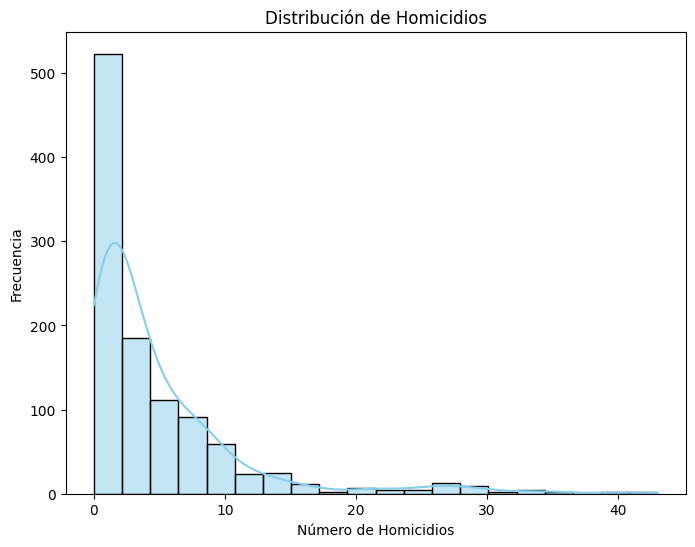

In [ ]:
#histograma de la variable 'homicide'
plt.figure(figsize=(8, 6))
sns.histplot(df['homicide'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Homicidios')
plt.xlabel('Número de Homicidios')
plt.ylabel('Frecuencia')
plt.show()

##Interpretacion:

La distribución de homicidios muestra que la mayoría de las ciudades tienen un bajo número de homicidios, con una cola larga hacia la derecha, lo que indica que hay algunas ciudades con un número significativamente más alto de homicidios que el resto.
La distribución es asimétrica positiva, lo que significa que la mayoría de las ciudades tienen pocos homicidios, pero algunas tienen un número considerablemente alto.

##Visualización bivariada (Diagrama de caja de 'homicide' vs 'city_cat'):

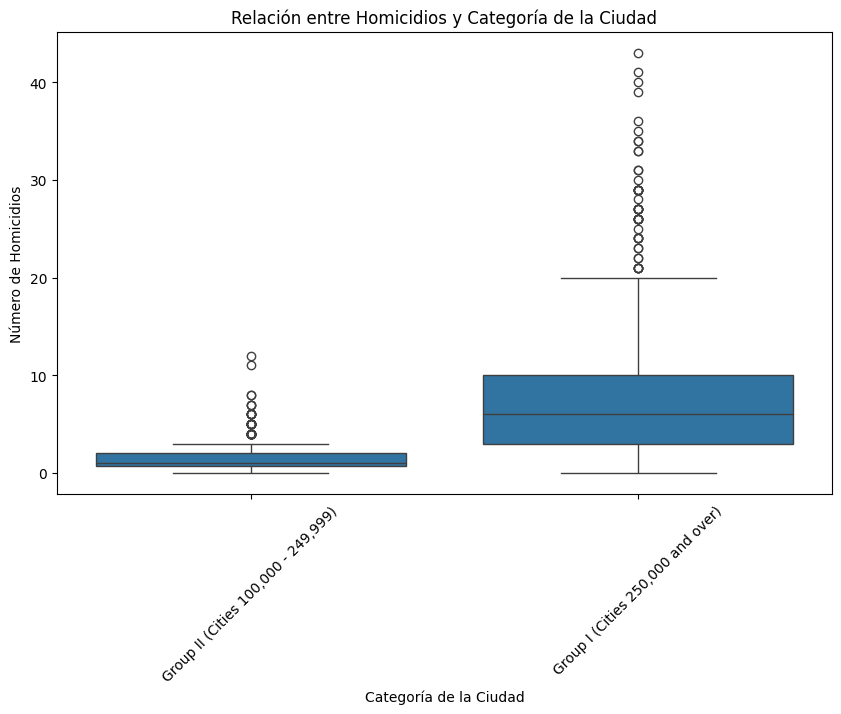

In [ ]:
# Relación entre 'homicide' y 'city_cat'
plt.figure(figsize=(10, 6))
sns.boxplot(x='city_cat', y='homicide', data=df)
plt.title('Relación entre Homicidios y Categoría de la Ciudad')
plt.xlabel('Categoría de la Ciudad')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=45)
plt.show()

##Interpretacion:

El diagrama de caja muestra la variación en el número de homicidios según la categoría de la ciudad.
Se observa que las ciudades en diferentes categorías tienen diferentes rangos y medianas de homicidios. Por ejemplo, las ciudades en la categoría de mayor tamaño pueden tener más homicidios en promedio en comparación con las ciudades más pequeñas.
Se pueden identificar valores atípicos en cada categoría de ciudad, lo que indica ciudades que tienen un número inusualmente alto o bajo de homicidios en comparación con otras ciudades de la misma categoría.

##Visualización trivariada (Gráfico de dispersión de 'homicide' vs 'inc_year' vs 'city_cat'):

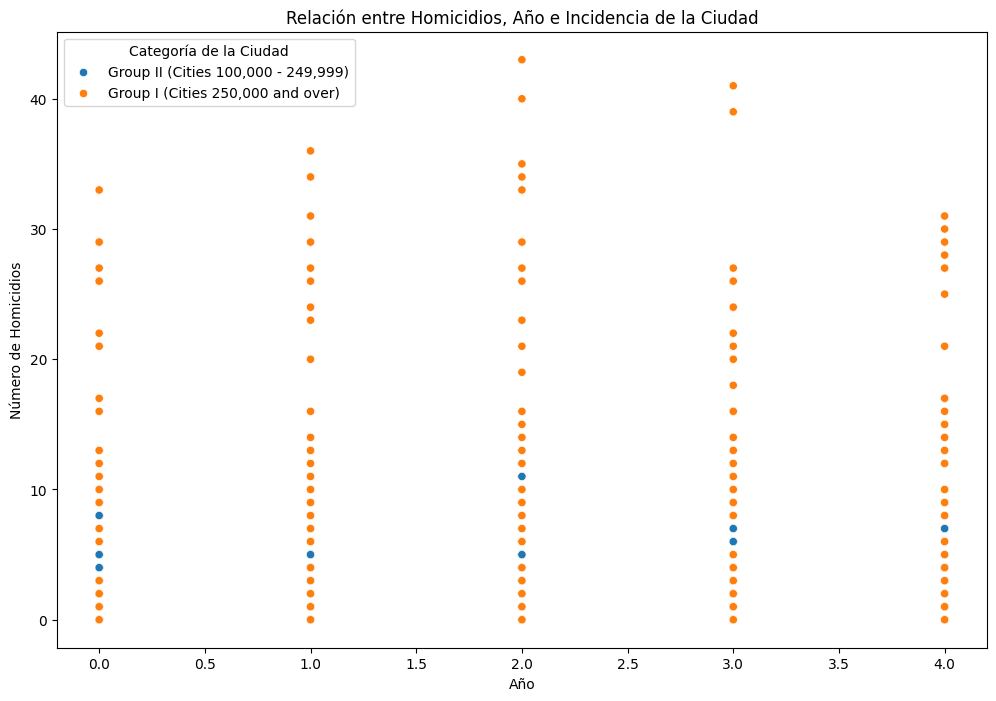

In [ ]:
# Relación entre 'homicide', 'inc_year' y 'city_cat'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='inc_year', y='homicide', hue='city_cat', data=df)
plt.title('Relación entre Homicidios, Año e Incidencia de la Ciudad')
plt.xlabel('Año')
plt.ylabel('Número de Homicidios')
plt.legend(title='Categoría de la Ciudad')
plt.show()

#Interpretacion:

El gráfico de dispersión muestra la relación entre el número de homicidios, el año de incidencia y la categoría de la ciudad.
Se pueden identificar tendencias en el número de homicidios a lo largo de los años para diferentes categorías de ciudades. Por ejemplo, algunas categorías de ciudades pueden mostrar un aumento o disminución en el número de homicidios a lo largo del tiempo.
La distribución de los puntos en el gráfico de dispersión proporciona información sobre la dispersión de los datos y cualquier patrón que pueda existir entre las variables. Por ejemplo, si los puntos tienden a agruparse en una región específica del gráfico, esto puede indicar una relación entre el año, la categoría de la ciudad y el número de homicidios.

#9 Analisis Exploratorio EDA





<ipython-input-10-7132703ee015>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='inc_year', y='homicide', hue='inc_month', ci=None)


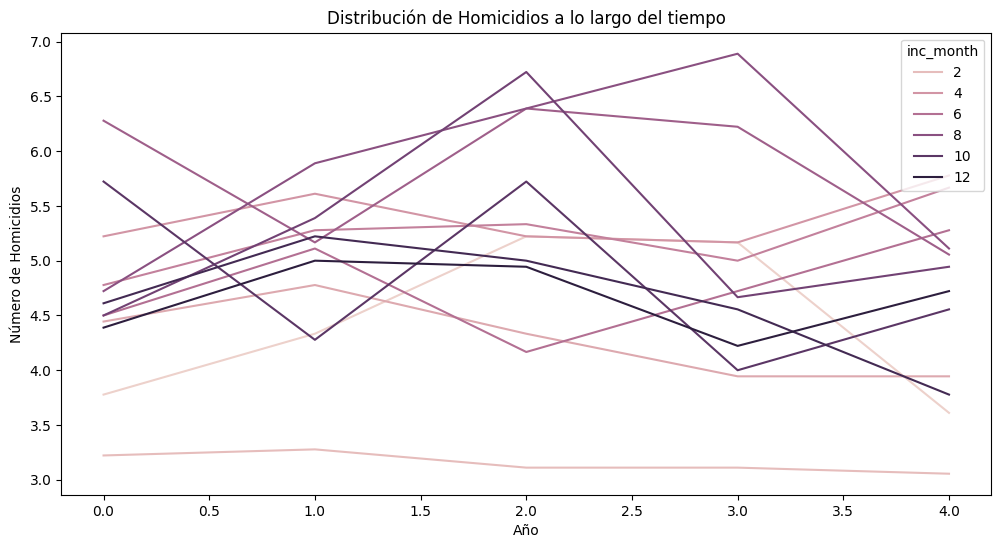

In [ ]:
# Visualización de la distribución de crímenes por mes y año
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='inc_year', y='homicide', hue='inc_month', ci=None)
plt.title('Distribución de Homicidios a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Homicidios')
plt.show()

#Distribución de Homicidios a lo largo del tiempo
Interpretación: Este gráfico muestra la variación mensual de homicidios a lo largo de los años. Se puede identificar patrones estacionales o tendencias a lo largo de los años. Por ejemplo, Se puede observar si hay un aumento de homicidios en ciertos meses o años.

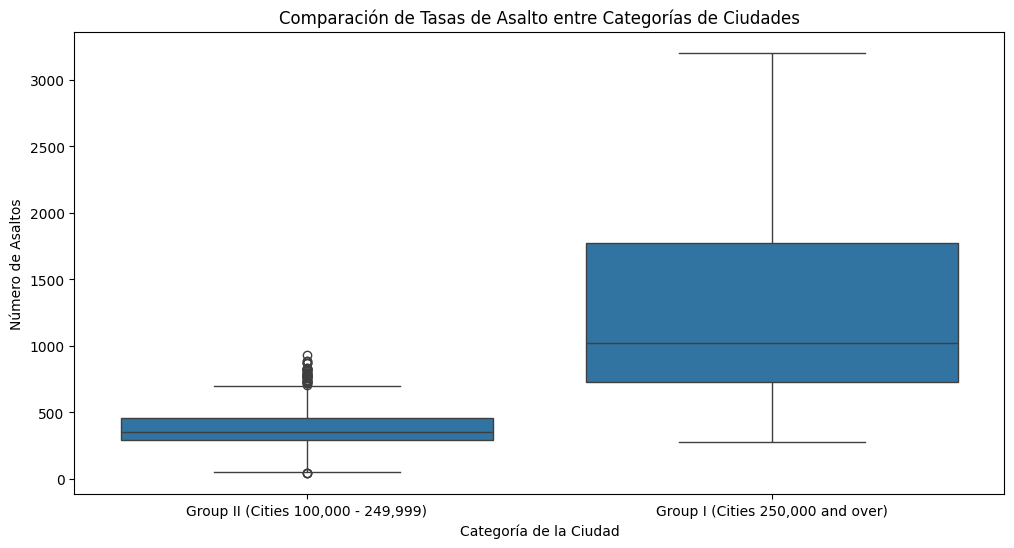

In [ ]:
# Comparación de tasas de crímenes entre diferentes categorías de ciudades
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='city_cat', y='assault')
plt.title('Comparación de Tasas de Asalto entre Categorías de Ciudades')
plt.xlabel('Categoría de la Ciudad')
plt.ylabel('Número de Asaltos')
plt.show()

#Comparación de Tasas de Asalto entre Categorías de Ciudades
Interpretación: El boxplot permite comparar la distribución de asaltos en diferentes categorías de ciudades. Se puede identificar si hay disparidades significativas en las tasas de asalto entre ciudades de diferentes categorías.

<Figure size 1400x800 with 0 Axes>

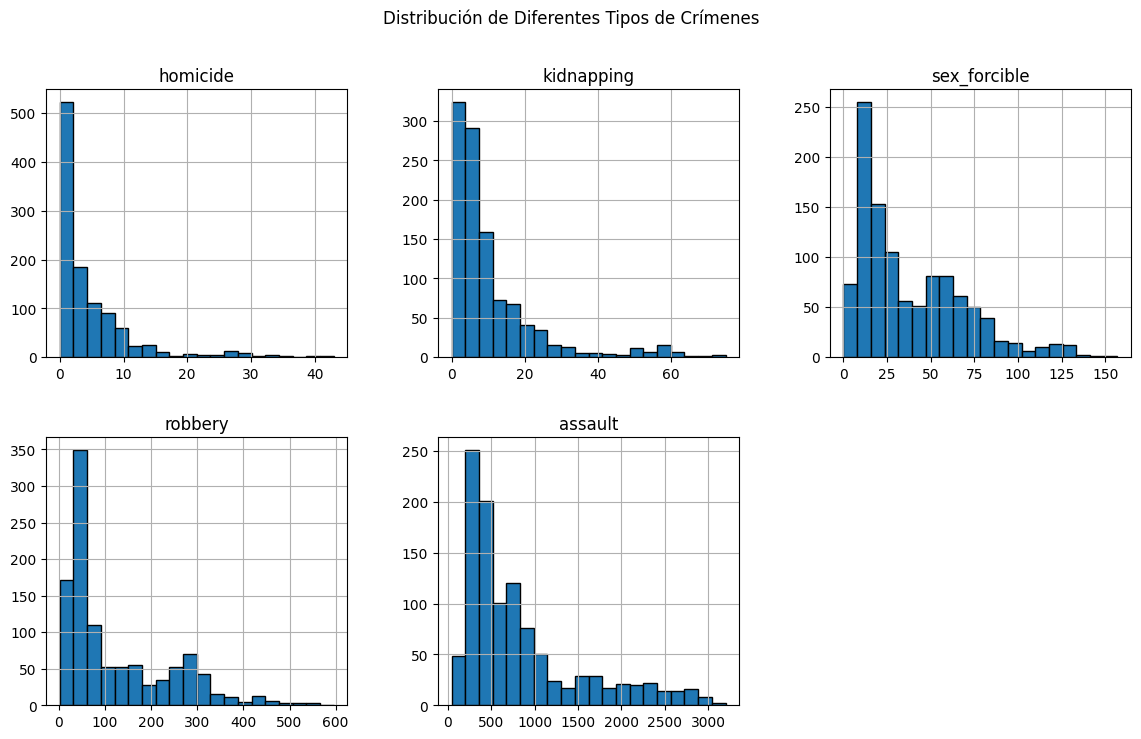

In [ ]:
# Análisis de la distribución de diferentes tipos de crímenes
crime_columns = ['homicide', 'kidnapping', 'sex_forcible', 'robbery', 'assault']
plt.figure(figsize=(14, 8))
df[crime_columns].hist(bins=20, figsize=(14, 8), layout=(2, 3), edgecolor='black')
plt.suptitle('Distribución de Diferentes Tipos de Crímenes')
plt.show()

#Distribución de Diferentes Tipos de Crímenes
Interpretación: Estos histogramas muestran la distribución de diferentes tipos de crímenes (homicidios, secuestros, delitos sexuales, robos y asaltos). Se puede identificar la frecuencia relativa de cada tipo de crimen y observar patrones en sus distribuciones.

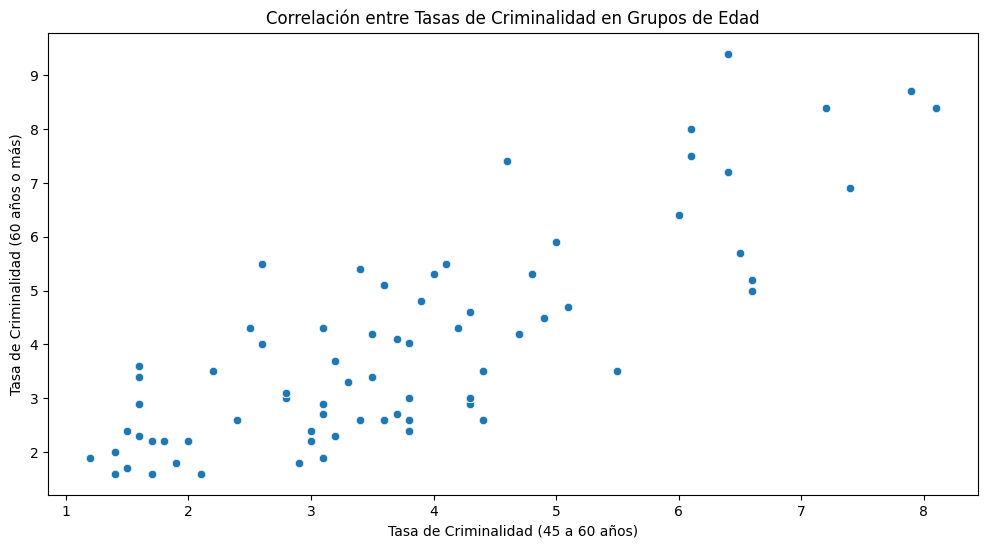

In [ ]:
# Correlación entre tasas de criminalidad y grupos de edad
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='lag_com_45_to_60', y='lag_com_60_plus')
plt.title('Correlación entre Tasas de Criminalidad en Grupos de Edad')
plt.xlabel('Tasa de Criminalidad (45 a 60 años)')
plt.ylabel('Tasa de Criminalidad (60 años o más)')
plt.show()

#Correlación entre Tasas de Criminalidad en Grupos de Edad
Interpretación: El gráfico de dispersión muestra la relación entre la tasa de criminalidad en los grupos de edad de 45 a 60 años y 60 años o más. Con este podemos evaluar si existe una correlación entre estas variables, lo que podría indicar patrones demográficos relacionados con la criminalidad.

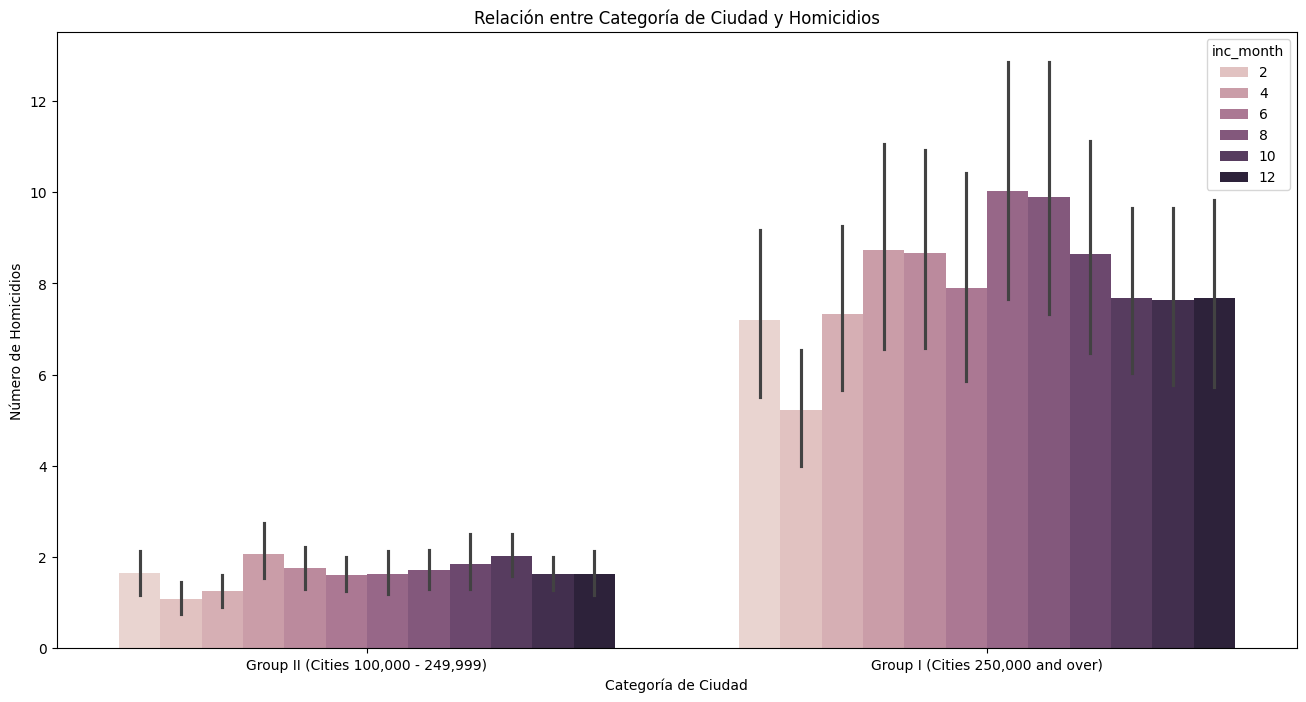

In [ ]:
# Relación entre la categoría de la ciudad y diferentes tipos de crímenes
plt.figure(figsize=(16, 8))
sns.barplot(data=df, x='city_cat', y='homicide', hue='inc_month')
plt.title('Relación entre Categoría de Ciudad y Homicidios')
plt.xlabel('Categoría de Ciudad')
plt.ylabel('Número de Homicidios')
plt.show()

#Relación entre Categoría de Ciudad y Homicidios
Interpretación: Este gráfico de barras muestra la relación entre la categoría de la ciudad y el número de homicidios, desglosado por mes. Se puede observar si ciertas categorías de ciudades experimentan un mayor número de homicidios en determinados meses.

#10 Conclusiones
Basandonos en los análisis realizados y las preguntas de interés e hipótesis planteadas, podemos llegar a las siguientes conclusiones:

##Variación temporal de los homicidios:
Existe una variación en el número de homicidios a lo largo del tiempo, lo que sugiere posibles patrones estacionales o tendencias a lo largo de los años. Esto podría relacionarse con factores como cambios en las políticas de seguridad, eventos sociales o económicos, entre otros.
##Disparidades en la tasa de homicidios entre ciudades:
Las ciudades de diferentes categorías muestran variaciones en el número de homicidios. Esto sugiere que factores como el tamaño de la población, la densidad, el nivel socioeconómico u otros pueden influir en la tasa de homicidios. Es importante investigar más para comprender estas disparidades y sus causas subyacentes.
##Impacto de la urbanización en la criminalidad:
La categoría de la ciudad parece estar relacionada con el número de homicidios, lo que sugiere que la urbanización podría estar asociada con mayores tasas de criminalidad. Sin embargo, se necesitan análisis más detallados para confirmar esta relación y comprender mejor cómo otros factores pueden influir en esta dinámica.
##Posible influencia de la edad en la criminalidad:
Se observa una correlación entre la tasa de homicidios y las variables relacionadas con la edad, como 'lag_com_45_to_60' y 'lag_com_60_plus'. Esto sugiere que ciertos grupos de edad pueden estar más involucrados en la comisión de homicidios. Explorar más esta relación puede proporcionar información valiosa para la prevención y el control de la criminalidad.

En resumen, estos análisis preliminares nos brindan información sobre las posibles tendencias y patrones en los datos de homicidios, así como también destacan áreas clave que pueden requerir una investigación más detallada para comprender mejor los factores subyacentes que influyen en la criminalidad.